<a href="https://colab.research.google.com/github/VictorCalebeIFG/MaxxiTeste/blob/main/Maxxi_exercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Manipulação e análise de dados**
### *A partir das tabelas cadastro.csv  e vendas.csv, resolva as seguintes questões:*

**Q1:** Qual a pessoa (cod_cadastro) que gastou mais? e a que gastou menos?

**Q2:**Qual a região de procedência que gasta mais?

**Q3:**Qual o produto que mais é vendido em quantidade?

**Q4:** alguma característica da que identifique o grupo das pessoas (top 5) que compram mais produtos em quantidade? E as que gastam mais dinheiro?

**Q5:** consegue ver alguma relação entre o grau de instrução e o número de filhos? Descreva a sua interpretação do caso, utilizando os dados para justificar as suas conclusões.

**Q6:**Imagine que a empresa em questão queira desenvolver um programa de cashback de benefícios baseada no perfil dos clientes, sendo assim, o primeiro passo seria desenvolver este perfil. Proponha um critério para classificar os clientes em clientes diamante, ouro e prata . Justifique a sua resposta.


**Carregando Dataframes com os dados necessários:**

In [1195]:
# Importando a Biblioteca pandas.
import pandas as pd
import matplotlib.pyplot as plt

cadastro_git_hub    = "https://raw.githubusercontent.com/VictorCalebeIFG/MaxxiTeste/main/avaliacao_dataops/avaliacao_dataops/cadastro.csv"
vendas_git_hub      = "https://raw.githubusercontent.com/VictorCalebeIFG/MaxxiTeste/main/avaliacao_dataops/avaliacao_dataops/vendas.csv"

cadastro_data       = pd.read_csv(cadastro_git_hub, delimiter=';')
venda_data          = pd.read_csv(vendas_git_hub,   delimiter=';')


##🎯 **Q1:** **Qual a pessoa (cod_cadastro) que gastou mais? e a que gastou menos?**




   

   








In [1196]:
# Somando os valores dentro de cada grupo. (agrupado pelo cod_cadastro).
# Ou seja, registros de "valor" com mesmo "cod_cadastro" serão somados em um único registro.
codXvalor = venda_data[["cod_cadastro", "valor"]]
vendas = codXvalor.groupby(['cod_cadastro']).sum()

⭐ **Reposta:**

In [1197]:
print("-"*10);print("RESPOSTA:");print("-"*10)

print("Quem Gastou mais:")
print("cod_cadastro:",vendas['valor'].idxmax(),"; valor total:",vendas['valor'].max())

print("\nQuem Gastou menos:")
print("cod_cadastro:",vendas['valor'].idxmin(),"; valor total:",vendas['valor'].min())

----------
RESPOSTA:
----------
Quem Gastou mais:
cod_cadastro: 27 ; valor total: 47.800000000000004

Quem Gastou menos:
cod_cadastro: 16 ; valor total: 2.8



##🎯 **Q2:** **Qual a região de procedência que gasta mais?**


In [1198]:
codXvalorXreg = codXvalor.merge(
                cadastro_data[['cod_cadastro','reg_procedencia']],
                how='left',
                on = 'cod_cadastro')

regprocXvalortotal= codXvalorXreg[['reg_procedencia','valor']].groupby(['reg_procedencia']).sum()

regprocXvalortotal

,valor
reg_procedencia,
capital,165.90
interior,189.93
outra,166.67


⭐ **Reposta:**

In [1199]:
print("-"*10);print("RESPOSTA:");print("-"*10)

print("Região de procedencia que gastou mais:",regprocXvalortotal['valor'].idxmax())
print("Valor gasto:",regprocXvalortotal.max()[0])

----------
RESPOSTA:
----------
Região de procedencia que gastou mais: interior
Valor gasto: 189.93




##🎯 **Q3:** **Qual o produto que mais é vendido em quantidade?**

In [1200]:
prod_qtd = venda_data[['produto']]

prod_table = prod_qtd.pivot_table(columns=['produto'], aggfunc='size')

⭐ **Reposta:**

In [1201]:
print("-"*10) ;print("RESPOSTA:");print("-"*10)
print("Produto Mais Vendido:", prod_table.idxmax())
print("Quantidade Vedida:",prod_table.max())

----------
RESPOSTA:
----------
Produto Mais Vendido: Chocolate
Quantidade Vedida: 7



##🎯 **Q4:** **Existe alguma característica da que identifique o grupo das pessoas (top 5) que compram mais produtos em quantidade? E as que gastam mais dinheiro?**

In [1202]:
# Data base com apenas o "cod_cadastro"
codcadastroXqtd = venda_data[['cod_cadastro']]

# Conta quantos registros cada "cod_cadastro" tem.
cod_cadastro_count = codcadastroXqtd.pivot_table(columns = ['cod_cadastro'],  aggfunc='size')

# Cria um data frame com os dados obtidos anteriormente.
cadastroXquantidade_data = pd.DataFrame({'quantidade': cod_cadastro_count})

# Ordenar de forma decrescente em relação a quantidade.
cadastroXquantidade_data.sort_values(by= ['cod_cadastro'], ascending = False , inplace = True)

cadastroXquantidade_data.merge(cadastro_data,how = 'left', on = 'cod_cadastro').head()

,cod_cadastro,quantidade,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia
0,36,3,casado,3-superior,3.0,23.30,42,interior
1,35,3,casado,2-ensino medio,2.0,19.40,48,capital
2,34,3,solteiro,3-superior,NaN,18.75,33,capital
3,33,3,casado,3-superior,3.0,17.26,43,capital
4,32,3,casado,2-ensino medio,1.0,16.61,36,interior


In [1203]:
codcadastroXvalortotal = codXvalorXreg[['cod_cadastro','valor']].groupby(['cod_cadastro']).sum()

codcadastroXvalortotal.sort_values(by = ['valor'],ascending = False , inplace = True)

codcadastroXvalortotal.merge(cadastro_data,how = 'left', on = 'cod_cadastro').head()

,cod_cadastro,valor,estado_civil,grau_instrucao,num_filhos,salario,idade_anos,reg_procedencia
0,27,47.8,solteiro,1-ensino fundamental,NaN,13.85,46,outra
1,34,43.5,solteiro,3-superior,NaN,18.75,33,capital
2,29,37.5,casado,2-ensino medio,5.0,14.71,40,interior
3,7,35.5,solteiro,1-ensino fundamental,NaN,6.86,41,interior
4,35,31.8,casado,2-ensino medio,2.0,19.40,48,capital


⭐ **Reposta:**

▶ As 5 primeiras pessoas que **mais compraram por quantidade** (todas compraram 3) tem em comum os seguintes pontos



*   A maioria são casados (4/5 são casados).
*   A maioria moram na capital e o resto no interior (3/5 moram na capital).
*   Todos possuem, pelo menos, o segundo grau.
*   Todos Possuem salário acima dos 16.
*   Todos estão acima dos 30 anos.


▶ Já nas 5 pessoas que **mais gastaram** temos que:


*   A maioria não possuem filhos (3/5 não possuem filhos).
*   A maioria são solteiros (3/5 são solteiros).
*   Todos tem pelos menos ensino Fundamental.
*   A maioria não tem filhos (3/5 não possuem filhos).
*   A maioria possue salário acima de 10 (somente 1 entre os 5 estão abaixo de 10)
*   Todos possuem mais de 30 anos.
*   A procedência dos três é bem variada.



















##🎯 **Q5:** **Você consegue ver alguma relação entre o grau de instrução e o número de filhos? Descreva a sua interpretação do caso, utilizando os dados para justificar as suas conclusões.**

In [1204]:
#Verificando quais "graus_instrucao" existem na tabela.
cadastro_data[['grau_instrucao','num_filhos']].fillna(0).groupby(['grau_instrucao']).sum()

,num_filhos
grau_instrucao,
1-ensino fundamental,8.0
2-ensino medio,19.0
3-superior,6.0


💡 **Porcentagem do total de filhos para cada grau de instrução:**

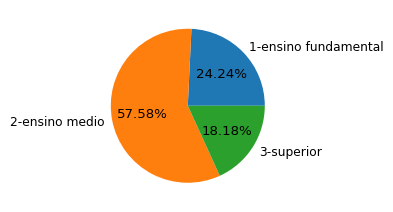

In [1205]:
import matplotlib.pyplot as plt

aux = cadastro_data[['grau_instrucao','num_filhos']].fillna(0).groupby(['grau_instrucao']).sum()

slices = aux['num_filhos'].values.tolist()
labels = aux.index.values.tolist()

plt.figure(figsize = (2.5, 2.5)); plt.pie(slices,labels=labels,autopct = '%.2f%%'
);

💡 **Porcentagem filhos dentro de cada grau de instrução:**

In [1206]:
pct_filhos = []

def porcentagem_filhos(grau):
# Tabela com os registros do cadastro que possume "grau_instrucao = 2-ension medio"
    aux = cadastro_data[['grau_instrucao','num_filhos']].query('grau_instrucao == "{}"'.format(grau)).fillna(0)
    total = aux['grau_instrucao'].count() # Total de cadastro com "grau_instrucao = 2-ensino medio"
    filho = aux[['num_filhos']].query('num_filhos > 0').count()[0] # Total de cadastros com "2-ensimo medio" e pelomenos um filho

    return (filho/total)*100

# Colocando as porcentagens em uma lista para poder montar um gráfico.
pct_filhos.append(porcentagem_filhos('1-ensino fundamental'))
pct_filhos.append(porcentagem_filhos('2-ensino medio'))
pct_filhos.append(porcentagem_filhos('3-superior'))



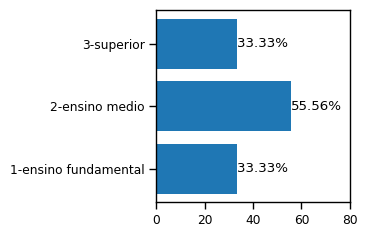

In [1207]:
plt.figure(figsize = (2.5, 2.5))
plt.xlim(right = 80)
plt.bar_label(plt.barh(['1-ensino fundamental','2-ensino medio','3-superior'],pct_filhos),fmt='%.2f%%');
